In [36]:
import pandas as pd
import numpy as np

# Seed for reproducibility
np.random.seed(0)

# Generate sample data for 200 baseball players
num_players = 250
games_played = np.random.randint(50, 160, size=num_players)  # Number of games played
home_runs = np.random.randint(0, 50, size=num_players)  # Number of home runs
batting_average = np.random.uniform(0.2, 0.4, size=num_players)  # Batting average
all_star = np.random.choice([0, 1], size=num_players)  # All-Star status (0 for No, 1 for Yes)

# Create a DataFrame
data = {
    'Games_Played': games_played,
    'Home_Runs': home_runs,
    'Batting_Average': batting_average,
    'All_Star': all_star
}
baseball_df = pd.DataFrame(data)

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [38]:
# Splitting the dataset into training and testing sets
X = baseball_df.drop('All_Star', axis=1)
y = baseball_df['All_Star']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [39]:
# Training the decision tree classifier
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [40]:

# Predicting test set results
y_pred = classifier.predict(X_test)

In [41]:

# Evaluating the classifier
# print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')


Accuracy: 0.42


In [42]:


# Tuning the model with GridSearchCV
param_grid = {'max_depth': np.arange(3, 10), 'criterion': ['gini']}
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, cv = 5)
grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini'],
                         'max_depth': array([3, 4, 5, 6, 7, 8, 9])})

In [43]:

# Best parameters and best score
print(f'Best parameters: {grid.best_params_}')
print(f'Best score: {grid.best_score_}')


Best parameters: {'criterion': 'gini', 'max_depth': 6}
Best score: 0.5


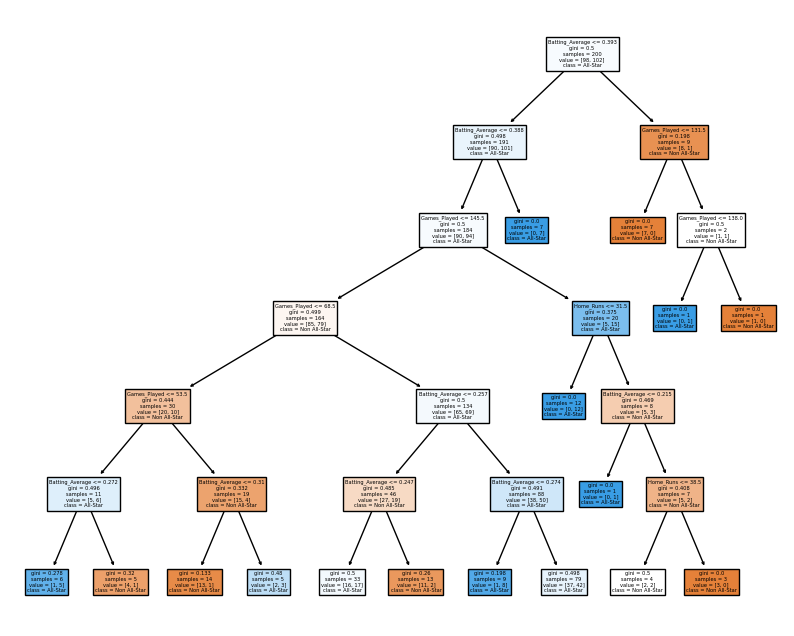

In [44]:


# Visualizing the decision tree
plt.figure(figsize=(10,8))
plot_tree(grid.best_estimator_, filled=True, feature_names=X.columns, class_names=['Non All-Star', 'All-Star'])
plt.show()

In [17]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=6, random_state=0)

In [25]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 9}

In [26]:
grid.best_score_

0.56875

In [ ]:
grid.